In [2]:
# !pip install --upgrade numexpr
# !pip install --upgrade pandas
# !pip install --upgrade networkx
# !pip install pyinform

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv

pd.__version__

'2.2.0'

In [4]:

""" Include containing folder for testing """
import sys, os
import datetime
import glob

sys.path.insert(0, os.path.abspath('../src'))
print(os.path.abspath('../src'))
# ---------------------------------------


/home/ec2-user/SageMaker/ing/src


In [5]:
""" 
Test in local pycharm env:
    Uncomment the lines below to test in local machine.
    Otherwise keep them commented 
"""
# from ing.src import ing
# from ing.src import S3Access
# -----------------------------


""" 
Test in aws:
    Uncomment the lines below to test on aws sagemaker. 
    Otherwise keep them commented.
"""
import ing
# -----------------------------

# s3 specific libraries
import s3fs
import boto3
s3 = s3fs.S3FileSystem(anon=False)


"""
Usual module/package imports go below here
"""
import pandas as pd
# -----------------------------


In [6]:
import glob
import pprint

scenario_metadata_paths = [f"s3://{dirpath}" for dirpath in s3.glob("s3://mips-phase-2/scenarios/*/metadata_*.csv")]
pprint.pprint(scenario_metadata_paths)

scenario_to_date = { os.path.basename(os.path.dirname(this_path)): datetime.datetime.strptime(pd.read_csv(this_path).iloc[0]["Date"] , "%Y-%m-%d").astimezone(datetime.timezone.utc) for this_path in scenario_metadata_paths }
pprint.pprint(scenario_to_date)

scenario_to_datafiles = { os.path.basename(os.path.dirname(this_path)): [f"s3://{s3path}" for s3path in s3.glob("{}/raw_brandwatch/*".format(os.path.dirname(this_path)))] for this_path in scenario_metadata_paths }
pprint.pprint(scenario_to_datafiles)

['s3://mips-phase-2/scenarios/anniversary/metadata_Anniversary.csv',
 's3://mips-phase-2/scenarios/biden/metadata_BidenVisit.csv',
 's3://mips-phase-2/scenarios/bucha_crimes/metadata_BuchaCrimes.csv',
 's3://mips-phase-2/scenarios/crimes_un_report/metadata_CrimesUN.csv',
 's3://mips-phase-2/scenarios/khersion_retreat/metadata_KhersonRetreat.csv',
 's3://mips-phase-2/scenarios/mariupol_hospital/metadata_MariupolHospital.csv',
 's3://mips-phase-2/scenarios/mariupol_theatre/metadata_MariupolTheatre.csv',
 's3://mips-phase-2/scenarios/putin_warrant/metadata_PutinWarrant.csv',
 's3://mips-phase-2/scenarios/russia_mobilize/metadata_Mobilize.csv',
 's3://mips-phase-2/scenarios/russian_missile_cross_poland/metadata_PolandMissile.csv',
 's3://mips-phase-2/scenarios/tanks/metadata_Tanks.csv',
 's3://mips-phase-2/scenarios/zelensky_visit_the_us/metadata_ZelenskyVisit.csv']


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


{'anniversary': datetime.datetime(2023, 2, 24, 0, 0, tzinfo=datetime.timezone.utc),
 'biden': datetime.datetime(2023, 2, 20, 0, 0, tzinfo=datetime.timezone.utc),
 'bucha_crimes': datetime.datetime(2022, 4, 3, 0, 0, tzinfo=datetime.timezone.utc),
 'crimes_un_report': datetime.datetime(2022, 9, 23, 0, 0, tzinfo=datetime.timezone.utc),
 'khersion_retreat': datetime.datetime(2022, 11, 11, 0, 0, tzinfo=datetime.timezone.utc),
 'mariupol_hospital': datetime.datetime(2022, 3, 9, 0, 0, tzinfo=datetime.timezone.utc),
 'mariupol_theatre': datetime.datetime(2022, 3, 16, 0, 0, tzinfo=datetime.timezone.utc),
 'putin_warrant': datetime.datetime(2023, 3, 17, 0, 0, tzinfo=datetime.timezone.utc),
 'russia_mobilize': datetime.datetime(2022, 9, 21, 0, 0, tzinfo=datetime.timezone.utc),
 'russian_missile_cross_poland': datetime.datetime(2022, 12, 21, 0, 0, tzinfo=datetime.timezone.utc),
 'tanks': datetime.datetime(2023, 1, 25, 0, 0, tzinfo=datetime.timezone.utc),
 'zelensky_visit_the_us': datetime.datetime

In [7]:
mins = {}
maxs = {}
for scenario in scenario_to_datafiles:
    adsr = ing.AnyDataSourceReader()
    msgs = adsr.read_files_list(scenario_to_datafiles[scenario])
    mins[scenario] = msgs["datetime"].min()
    maxs[scenario] = msgs["datetime"].max()

Brandwatch GUI data : s3://mips-phase-2/scenarios/anniversary/raw_brandwatch/2023_01_01_to_2023_06_01_Anniversary_2040608565_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/biden/raw_brandwatch/2023_01_01_to_2023_06_01_Biden_2040516989_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/bucha_crimes/raw_brandwatch/2022_03_01_to_2022_05_11_BuchaCrimes_2038774197_UkrianeWar_MainQuery.csv.zip


/home/ec2-user/SageMaker/ing/src/ing/brandwatch_data_reader.py:33: DtypeWarning: Columns (24,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(in_file_path, skiprows=6,


Brandwatch GUI data : s3://mips-phase-2/scenarios/bucha_crimes/raw_brandwatch/2022_05_12_to_2022_08_01_BuchaCrimes_2038802813_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/crimes_un_report/raw_brandwatch/2022_08_01_to_2023_01_01_CrimesUN_2038924200_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/khersion_retreat/raw_brandwatch/2022_09_01_to_2023_04_01_KhersonRetreat_2038933193_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/mariupol_hospital/raw_brandwatch/2022_02_14_to_2022_08_01_MariupolHospital_2038664796_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/mariupol_theatre/raw_brandwatch/2022_03_01_to_2022_07_01_MariupolTeatre_2038748265_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/putin_warrant/raw_brandwatch/2023_02_01_to_2023_06_01_Putin_2040564978_UkrianeWar_MainQuery.csv.zip
Brandwatch GUI data : s3://mips-phase-2/scenarios/

In [8]:
data_ranges = []
for scenario in scenario_to_datafiles:
    begin = scenario_to_date[scenario] - mins[scenario]
    after = maxs[scenario] - scenario_to_date[scenario]
    data_ranges.append((scenario, begin, after))
data_ranges = pd.DataFrame(data_ranges, columns=["Scenario", "Begin", "After"])
data_ranges

,Scenario,Begin,After
0,anniversary,53 days 18:33:29,128 days 03:03:14
1,biden,49 days 18:45:31,102 days 02:58:56
2,bucha_crimes,32 days 13:07:11,120 days 21:32:00
3,crimes_un_report,53 days 00:00:00,100 days 23:18:21
4,khersion_retreat,70 days 23:40:18,141 days 00:00:00
5,mariupol_hospital,22 days 17:53:10,145 days 23:47:25
6,mariupol_theatre,14 days 23:48:54,107 days 23:24:00
7,putin_warrant,43 days 18:52:05,77 days 03:58:12
8,russia_mobilize,51 days 00:00:00,102 days 23:07:00
9,russian_missile_cross_poland,110 days 18:31:00,101 days 20:27:01


In [9]:
data_ranges.min()

Scenario         anniversary
Begin       14 days 23:48:54
After       77 days 03:58:12
dtype: object

In [57]:
required_dirs = ["./VAR_DATA"]
for target_dir in required_dirs:
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)


def calculate_te_for_scenario(in_scenario_name):
    print(in_scenario_name)

    START_DATE = scenario_to_date[in_scenario_name] - datetime.timedelta(14)
    END_DATE = scenario_to_date[in_scenario_name] + datetime.timedelta(90)

    required_dirs = [f"./VAR_DATA/{in_scenario_name}"]
    for target_dir in required_dirs:
        if not os.path.exists(target_dir):
            os.mkdir(target_dir)

    adsr = ing.AnyDataSourceReader()
    msgs = adsr.read_files_list(scenario_to_datafiles[in_scenario_name])
    print("Min time:", msgs["datetime"].min())
    print("Max time:", msgs["datetime"].max())
    msgs.dropna(subset=["datetime", "platform", "source_user_id", "source_msg_id"], inplace=True)
    regex1 = re.compile(r"^anonymous$", flags=re.IGNORECASE)
    regex2 = re.compile(r"^admin$", flags=re.IGNORECASE)
    admin_anonymous_users_msgs_indexs = msgs[msgs["source_user_id"].apply(lambda x: not ((not regex1.match(x)) and (not regex2.match(x))))].index
    msgs.drop(admin_anonymous_users_msgs_indexs, inplace=True)
    print("Messages: ", msgs.shape)
    print("Users: ", msgs[["platform","source_user_id"]].value_counts().reset_index().shape)

    msgs = msgs[(msgs["datetime"] >= START_DATE) & (msgs["datetime"] <= END_DATE)].dropna(subset=["datetime", "platform", "source_user_id", "source_msg_id"])

    print("Period Messages: ", msgs.shape)
    user_msg_counts = msgs[["platform","source_user_id"]].value_counts().reset_index()
    print("Period Users: ", user_msg_counts.shape)
    print("================")
    user_msg_count = msgs[["platform","source_user_id"]].value_counts().reset_index()
    main_pool = user_msg_count[(user_msg_count["count"] > 30)]
    top_limit = 5
    while main_pool.iloc[:top_limit]["source_user_id"].nunique() < 5:
        top_limit += 1
    top5 = main_pool.iloc[:top_limit].drop_duplicates(subset="source_user_id", keep="first")
    bot_limit = 5
    while main_pool.iloc[-bot_limit:]["source_user_id"].nunique() < 5:
        bot_limit += 1
    bot5 = main_pool.iloc[-bot_limit:].drop_duplicates(subset="source_user_id", keep="last")
    mid_candidates = main_pool.iloc[top_limit: main_pool.shape[0] - bot_limit]["source_user_id"].unique()
    mid_candidates = set(mid_candidates).difference( set(top5["source_user_id"].unique()).union(* bot5["source_user_id"].unique()) )
    mid_candidates = np.random.choice(list(mid_candidates) , size=10, replace=False)
    mid10 = main_pool[main_pool["source_user_id"].isin(mid_candidates)].sort_values("count", ascending=False).drop_duplicates(subset="source_user_id", keep="first")
    selected_users = pd.concat([top5, mid10, bot5])
    print("Selected Users: ", selected_users.shape)
    main_pool["count"].plot()
    for idx in selected_users.index:
        plt.axvline(idx, color='k')
    plt.show()
    datetime_index = pd.date_range(START_DATE, END_DATE, freq="1D", tz=START_DATE.tzinfo)
    filtered_msgs = msgs.merge(selected_users, on=["platform", "source_user_id"], how="right")
    user_post_count_periodic = filtered_msgs.groupby(["platform", "source_user_id", pd.Grouper(key="datetime", freq="1D")]).size().reset_index().pivot_table(columns="source_user_id", index="datetime", values=0, fill_value=0).reindex(datetime_index, fill_value=0)
    user_post_count_periodic.to_csv(f"./VAR_DATA/{in_scenario_name}/{in_scenario_name}_user_post_count_periodic.csv")
    selected_users.to_csv(f"./VAR_DATA/{in_scenario_name}/{in_scenario_name}_selected_users.csv")
    return msgs, START_DATE, END_DATE, selected_users, user_post_count_periodic

In [58]:
scenario_to_datafiles.keys()

dict_keys(['anniversary', 'biden', 'bucha_crimes', 'crimes_un_report', 'khersion_retreat', 'mariupol_hospital', 'mariupol_theatre', 'putin_warrant', 'russia_mobilize', 'russian_missile_cross_poland', 'tanks', 'zelensky_visit_the_us'])

mariupol_hospital
Brandwatch GUI data : s3://mips-phase-2/scenarios/mariupol_hospital/raw_brandwatch/2022_02_14_to_2022_08_01_MariupolHospital_2038664796_UkrianeWar_MainQuery.csv.zip
Min time: 2022-02-14 06:06:50+00:00
Max time: 2022-08-01 23:47:25+00:00
Messages:  (39490, 9)
Users:  (23302, 3)
Period Messages:  (38329, 9)
Period Users:  (22583, 3)
Selected Users:  (20, 3)


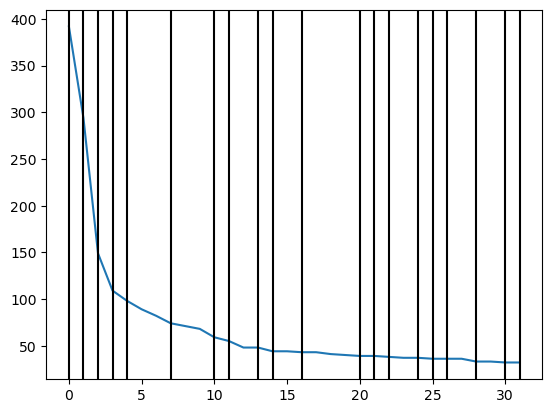

(105, 19)
---
bucha_crimes
Brandwatch GUI data : s3://mips-phase-2/scenarios/bucha_crimes/raw_brandwatch/2022_03_01_to_2022_05_11_BuchaCrimes_2038774197_UkrianeWar_MainQuery.csv.zip


/home/ec2-user/SageMaker/ing/src/ing/brandwatch_data_reader.py:33: DtypeWarning: Columns (24,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(in_file_path, skiprows=6,


Brandwatch GUI data : s3://mips-phase-2/scenarios/bucha_crimes/raw_brandwatch/2022_05_12_to_2022_08_01_BuchaCrimes_2038802813_UkrianeWar_MainQuery.csv.zip
Min time: 2022-03-01 10:52:49+00:00
Max time: 2022-08-01 21:32:00+00:00
Messages:  (90004, 9)
Users:  (56319, 3)
Period Messages:  (87414, 9)
Period Users:  (55292, 3)
Selected Users:  (20, 3)


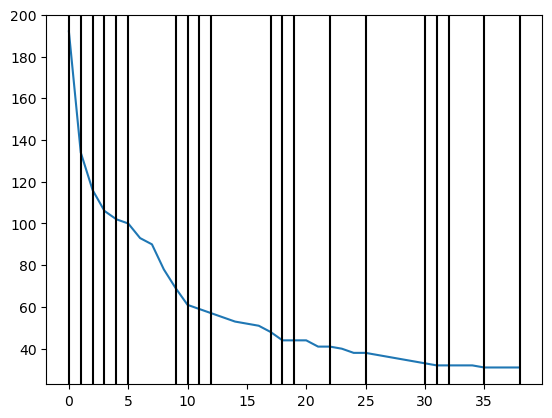

(105, 18)
---
anniversary
Brandwatch GUI data : s3://mips-phase-2/scenarios/anniversary/raw_brandwatch/2023_01_01_to_2023_06_01_Anniversary_2040608565_UkrianeWar_MainQuery.csv.zip
Min time: 2023-01-01 05:26:31+00:00
Max time: 2023-07-02 03:03:14+00:00
Messages:  (65736, 9)
Users:  (39543, 3)
Period Messages:  (56281, 9)
Period Users:  (35507, 3)
Selected Users:  (20, 3)


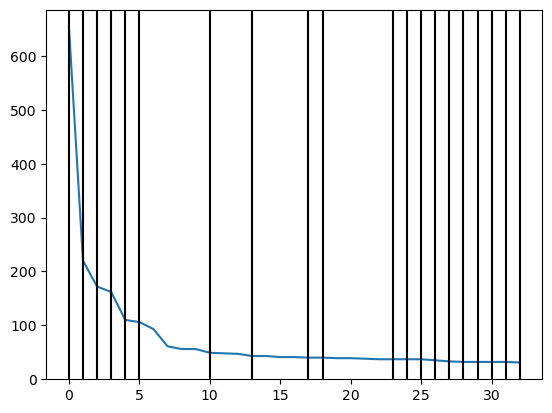

(105, 20)
---


In [59]:
for scenario in ["mariupol_hospital", "bucha_crimes", "anniversary"]:
    np.random.seed(123)
    msgs, start_date, end_date, selected_users, user_post_count_periodic = calculate_te_for_scenario(scenario)
    print(user_post_count_periodic.shape)
    print("---")

In [ ]:
user_post_count_periodic

In [49]:
selected_users

,platform,source_user_id,count
0,twitter.com,zogbanu,222
1,robinspost.com,Google News Search Results,197
2,robinspost.com,Bing News Search Results,176
3,twitter.com,randymot4,154
4,mexicanoccupation.blogspot.com,Unknown,123
5,twitter.com,zogbanu2,99
13,twitter.com,Galgebru,41
19,twitter.com,hrit_hailu,38
21,twitter.com,DogaliV,37
27,twitter.com,lily06881,34


In [298]:
user_msg_count = msgs[["platform","source_user_id"]].value_counts().reset_index()
main_pool = user_msg_count[(user_msg_count["count"] > 10)]
top_limit = 5
while main_pool.iloc[:top_limit]["source_user_id"].nunique() < 5:
    top_limit += 1
top5 = main_pool.iloc[:top_limit].drop_duplicates(subset="source_user_id", keep="first")
bot_limit = 5
while main_pool.iloc[-bot_limit:]["source_user_id"].nunique() < 5:
    bot_limit += 1
top_limit, bot_limit
bot5 = main_pool.iloc[-bot_limit:].drop_duplicates(subset="source_user_id", keep="last")
bot_limit, top_limit

(7, 5)

In [299]:
top5

,platform,source_user_id,count
0,reddit.com,autotldr,192
1,swifttelecast.com,Albert Wagner,134
2,theeagle.com,By The Associated Press By The Associated Press,116
3,digismak.com,George Lanington,106
4,twitter.com,freedom64303487,102


In [300]:
bot5

,platform,source_user_id,count
410,twitter.com,jondknight,11
412,twitter.com,ApiFeelGood,11
414,twitter.com,AngeliqueOdessa,11
415,twitter.com,New_Narrative,11
416,newsadvance.com,The Associated Press,11


In [301]:
mid_candidates = main_pool.iloc[top_limit: main_pool.shape[0] - bot_limit]["source_user_id"].unique()
mid_candidates = set(mid_candidates).difference( set(top5["source_user_id"].unique()).union(* bot5["source_user_id"].unique()) )
mid_candidates = np.random.choice(list(mid_candidates) , size=10, replace=False)
mid10 = main_pool[main_pool["source_user_id"].isin(mid_candidates)].sort_values("count", ascending=False).drop_duplicates(subset="source_user_id", keep="first")
selected_users = pd.concat([top5, mid10, bot5])

In [303]:
selected_users.shape

(20, 3)

In [255]:
top_limit = 5
bot_limit = 5
mid_candidates = main_pool.iloc[top_limit: main_pool.shape[0] - bot_limit]["source_user_id"].unique()
mid_candidates = set(mid_candidates).difference( set(top5["source_user_id"].unique()).union(* bot5["source_user_id"].unique()) )
mid_candidates = np.random.choice(list(mid_candidates) , size=10, replace=False)

In [256]:
mid_candidates

array(['Robert Wood', 'empyreanprotoc1', 'Bitcoin Ethereum', 'jward',
       'Bobby Coggins', 'OntheroadnewsAL', 'AmosrBSousa055', 'AP',
       'MinnesotaMaryS', 'Andrus'], dtype='<U20')

In [257]:
main_pool[main_pool["source_user_id"].isin(['subredditsummarybot', 'nytimesworld',
       'jerseyboy0423', 'CNNFrancePR', 'The Associated Press',
       'jmhamiltonblog', 'starsandstripes', 'melamed&amp;mavin',
       'nnfarnham', "Associated Press"])].sort_values("count", ascending=False).drop_duplicates(subset="source_user_id", keep="first")

,platform,source_user_id,count
2,mynorthwest.com,Associated Press,172
7,thisdayinjewishhistory.blogspot.com,melamed&amp;mavin,93
17,wtop.com,The Associated Press,41
25,twitter.com,jerseyboy0423,37
44,twitter.com,nytimesworld,26
66,reddit.com,subredditsummarybot,21
75,twitter.com,nnfarnham,19
121,twitter.com,jmhamiltonblog,15
153,twitter.com,CNNFrancePR,13
163,twitter.com,starsandstripes,13


In [258]:
msgs[msgs["source_user_id"].str.match("anonymous", case=False) | msgs["source_user_id"].str.match("admin", case=False)].index

Index([  3671,   4214,   4276,   4917,   4928,   5034,   5574,   8978,  10455,
        12412,
       ...
       102541, 103286, 103321, 103341, 104687, 110947, 115731, 123360, 124197,
       124273],
      dtype='int64', length=110)

In [259]:
msgs[msgs["source_user_id"].apply(lambda x: not ((not regex1.match(x)) and (not regex2.match(x))))].index

Index([  3671,   4214,   4276,   4917,   4928,   5034,   5574,   8978,  10455,
        12412,
       ...
       102482, 102541, 103286, 103321, 103341, 104687, 110947, 123360, 124197,
       124273],
      dtype='int64', length=102)

In [262]:
print(msgs.columns)
msgs.shape

Index(['datetime', 'title', 'source_msg_id', 'platform', 'source_user_id',
       'content', 'parent_source_user_id', 'parent_source_msg_id',
       'search_article_urls'],
      dtype='object')


(87414, 9)

In [263]:
selected_users

,platform,source_user_id,count
0,reddit.com,autotldr,192
1,swifttelecast.com,Albert Wagner,134
2,theeagle.com,By The Associated Press By The Associated Press,116
3,digismak.com,George Lanington,106
4,twitter.com,freedom64303487,102
11,mercurynews.com,Associated Press,59
103,twitter.com,Enanmix,22
120,twitter.com,SteinVhc,19
167,twitter.com,kcarruthers,16
184,twitter.com,KathleenWesterg,15


In [264]:
selected_users["count"].sum()

923

In [26]:
datetime_index = pd.date_range(start_date, end_date, freq="1D", tz=start_date.tzinfo)

NameError: name 'start_date' is not defined

In [266]:
filtered_msgs = msgs.merge(selected_users, on=["platform", "source_user_id"], how="right")

In [270]:
user_post_count_periodic = filtered_msgs.groupby(["platform", "source_user_id", pd.Grouper(key="datetime", freq="1D")]).size().reset_index().pivot_table(columns="source_user_id", index="datetime", values=0, fill_value=0)
user_post_count_periodic

source_user_id,Agence France-Presse,Albert Wagner,AngeliqueOdessa,ApiFeelGood,Associated Press,BoteroStar,By The Associated Press By The Associated Press,Enanmix,George Lanington,IridescentAshes,KathleenWesterg,Meglem3,New_Narrative,SteinVhc,The Associated Press,autotldr,freedom64303487,jondknight,kcarruthers,rashidaldosari
datetime,,,,,,,,,,,,,,,,,,,,
2022-03-20 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-03-21 00:00:00+00:00,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-03-22 00:00:00+00:00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-02 00:00:00+00:00,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-03 00:00:00+00:00,0.0,7.0,0.0,4.0,2.0,4.0,6.0,0.0,4.0,2.0,5.0,3.0,0.0,4.0,0.0,22.0,4.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2022-06-14 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-15 00:00:00+00:00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
user_post_count_periodic.to_csv(f"{scenario}_user_post_count_periodic.csv")

In [269]:
msgs[msgs["source_user_id"] == "Philip Cross"].groupby(pd.Grouper(key="datetime", freq="1D")).size().rename("NumMsgs").reset_index()

,datetime,NumMsgs


## Select only TWITTER users ???

In [73]:
time_user_posts = msgs.set_index("datetime").groupby([pd.Grouper(freq="1D"), "source_user_id"]).size().rename("num_posts_per_period").reset_index()
time_user_posts

,datetime,source_user_id,num_posts_per_period
0,2022-03-20 00:00:00+00:00,AP AP,1
1,2022-03-20 00:00:00+00:00,ASSOCIATED PRESS,1
2,2022-03-20 00:00:00+00:00,Associated Press,4
3,2022-03-20 00:00:00+00:00,Boud,1
4,2022-03-20 00:00:00+00:00,By EUGENE DANIELS,1
...,...,...,...
47873,2022-05-07 00:00:00+00:00,vitabonaest,1
47874,2022-05-07 00:00:00+00:00,xupon33124701,1
47875,2022-05-07 00:00:00+00:00,yacht_tv,1
47876,2022-05-07 00:00:00+00:00,zettie_geez,1


In [76]:
time_user_post_pivot = time_user_posts.pivot_table(index="datetime", columns="source_user_id", values="num_posts_per_period", fill_value=0)
time_user_post_pivot

source_user_id,-Apocalypto-,0001Cecilia,0007,000RM000,001maxlogic,004nino,007Dufour007,007_delic,007point5,008moonside,...,教皇罩梟一世,書桓,番組の途中ですがアフィサイトへの転載は禁止です (ﾜｯﾁｮｲ 15a2-WIdX),番組の途中ですがアフィサイトへの＼(^o^)／です,萬惡窮為首,赤羽蒼玄,구름 나그네,장재균,희귀고닉,Ｊｈｂｊｐ６６６
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-20 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-21 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-22 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-23 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-24 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-26 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-27 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-28 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-30 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
time_user_post_pivot.shape

(47, 36451)

In [5]:
# DATA_DIRECTORY_LIST = ["s3://mips-main/initial_data_collection/raw_data/brandwatch/", "s3://mips-main/initial_data_collection/TE_ready_data/V2/"]
#DATA_DIRECTORY_LIST = [ "C:/STUFF/RESEARCH/Brandwatch/mariupol_hospital_clean", "C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing"]
DATA_DIRECTORY_LIST = ["C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv"]
# NEWS_DOMAIN_TO_CLASS_FILE = "s3://mips-main-2/UFTM_classification-v2/news_table-v3-UT60.csv"
NEWS_DOMAIN_TO_CLASS_FILE = "C:/STUFF/RESEARCH/Brandwatch/news_table-v3-UT60.csv"
START_DATE = datetime.datetime(2018, 3, 1, tzinfo=datetime.timezone.utc)
END_DATE = datetime.datetime(2022, 5, 2, tzinfo=datetime.timezone.utc)
FREQUENCY = '6H'
MIN_PLAT_SIZE = 200
MIN_ACTIVITY_PER_MONTH = 10


In [6]:
paths = []
for data_dir in DATA_DIRECTORY_LIST:
    paths += glob.glob(os.path.join(data_dir, "*.csv*"))
# paths = [f"s3://{p}" for p in paths]
print(paths)

news_domain_classes_df = pd.read_csv(NEWS_DOMAIN_TO_CLASS_FILE,
                                     usecols=['Domain', 'tufm_class', 'Language'])
news_domain_classes_df.rename(columns={'Domain': 'news_domain', 'tufm_class': 'class', 'Language': 'lang'},
                              inplace=True)

paths

['C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_01_to_2018_03_06_withFb_2033735572_MainQuery.csv.zip', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_07_to_2018_03_07_withoutFb_2033735852_MIPs+test.csv.zip', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_07_to_2020_05_02_2033753991_MainQuery_FbIgOnly.csv.zip', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2022_02_24_H_09_to_2022_02_24_H_19_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2022_02_24_H_19_to_2022_02_25_H_08_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\fourchan_final_2018_03_2018_05.csv', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\reddit_comments_final_2018_03_2018_05.csv', 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\reddit_submissions_final_2018_03_2018_05.csv']


['C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_01_to_2018_03_06_withFb_2033735572_MainQuery.csv.zip',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_07_to_2018_03_07_withoutFb_2033735852_MIPs+test.csv.zip',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2018_03_07_to_2020_05_02_2033753991_MainQuery_FbIgOnly.csv.zip',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2022_02_24_H_09_to_2022_02_24_H_19_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\2022_02_24_H_19_to_2022_02_25_H_08_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\fourchan_final_2018_03_2018_05.csv',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\reddit_comments_final_2018_03_2018_05.csv',
 'C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\\reddit_submissions_final_2018_03_2018_05.csv']

In [7]:
# let data manager handle data
data_manager = ing.DataManager("./OUTPUTS")
data_manager.read_data_files(paths)
data_manager.all_osn_msgs_df

Reading data...
Brandwatch GUI data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\2018_03_01_to_2018_03_06_withFb_2033735572_MainQuery.csv.zip
Brandwatch GUI data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\2018_03_07_to_2018_03_07_withoutFb_2033735852_MIPs+test.csv.zip
Brandwatch GUI data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\2018_03_07_to_2020_05_02_2033753991_MainQuery_FbIgOnly.csv.zip
Brandwatch API data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\2022_02_24_H_09_to_2022_02_24_H_19_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip
Brandwatch API data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\2022_02_24_H_19_to_2022_02_25_H_08_cdondim_BWAPI_UkraineRussiaWarSO.csv.zip
4Chan data : C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\fourchan_final_2018_03_2018_05.csv
Reddit Comments data: C:/STUFF/RESEARCH/smyrna/Smyrna/data_collection/test_ing/indv\reddit_comments_final_2018_03_

,datetime,title,source_msg_id,platform,source_user_id,content,parent_source_user_id,parent_source_msg_id,search_article_urls
0,2018-03-06 23:59:57+00:00,RT @MarkUrban01 Sources: the poison used on Se...,http://twitter.com/melkaylan/statuses/97117357...,twitter.com,melkaylan,RT @MarkUrban01 Sources: the poison used on Se...,MarkUrban01,971147509434331138,http://twitter.com/melkaylan/statuses/97117357...
1,2018-03-06 23:59:50+00:00,RT @jimsciutto Keep watching this story: forme...,http://twitter.com/prutter_pat/statuses/971173...,twitter.com,prutter_pat,RT @jimsciutto Keep watching this story: forme...,jimsciutto,971042329158176769,http://twitter.com/prutter_pat/statuses/971173...
2,2018-03-06 23:59:49+00:00,RT @BBCTomSymonds Sergei Skripal’s 43 year old...,http://twitter.com/optouttwice/statuses/971173...,twitter.com,optouttwice,RT @BBCTomSymonds Sergei Skripal’s 43 year old...,BBCTomSymonds,970968487740035072,http://twitter.com/optouttwice/statuses/971173...
3,2018-03-06 23:59:40+00:00,"RT @W7VOA Sergei Skripal, who is 66, was grant...",http://twitter.com/lindhays/statuses/971173499...,twitter.com,lindhays,"RT @W7VOA Sergei Skripal, who is 66, was grant...",W7VOA,970727099052056576,http://twitter.com/lindhays/statuses/971173499...
4,2018-03-06 23:59:34+00:00,RT @KremlinTrolls **Relatives in Russia unable...,http://twitter.com/VedehiMajumdar/statuses/971...,twitter.com,VedehiMajumdar,RT @KremlinTrolls **Relatives in Russia unable...,KremlinTrolls,971007116201873408,http://twitter.com/VedehiMajumdar/statuses/971...
...,...,...,...,...,...,...,...,...,...
137379,2018-03-19 14:19:46+00:00,UK must prove Russian role in spy poisoning or...,85jsz7,reddit.com,autotldr,"This is the best tl;dr I could make, [original...",,,"autotldr, 85jsz7, This is the best tl;dr I cou..."
137380,2018-03-30 00:28:57+00:00,[Banned] /r/politics/: Russia expels diplomats...,886d01,reddit.com,alternate-source-bot,I was banned from /r/politics/. Here's what I ...,,,"alternate-source-bot, 886d01, I was banned fro..."
137381,2018-03-18 12:15:55+00:00,[Banned] /r/britposting/: Russia has stockpile...,85avqh,reddit.com,alternate-source-bot,I was banned from /r/britposting/. Here's what...,,,"alternate-source-bot, 85avqh, I was banned fro..."
137382,2018-03-27 18:05:00+00:00,[Banned] /r/news/: A complete incident or a co...,87kmlk,reddit.com,alternate-source-bot,I was banned from /r/news/. Here's what I woul...,,,"alternate-source-bot, 87kmlk, I was banned fro..."


In [8]:
data_manager.state

'RAW_DATA'

In [9]:
# preprocess
data_manager.preprocess(news_domain_classes_df, START_DATE, END_DATE)
data_manager.all_osn_msgs_df

Filter out dates...
Number of data points in between [2018-03-01 00:00:00+00:00] --> [2022-05-02 00:00:00+00:00] duration : (75360)
Filter out dates done.      ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=0.03125 seconds
Remove nan...
Remove nan done.  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=0.03125 seconds
add msg_id...
add msg_id done.  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... T=0.015625 seconds
Add article urls related columns...
Add article urls related columns done.     ...  ...  ...  ...  ...  ...  ... T=3.359375 seconds
identify news_domains...
identify news_domains done.      ...  ...  ...  ...  ...  ...  ...  ...  ... T=40.796875 seconds
identify class of each news_domain...
identify class of each news_domain done.   ...  ...  ...  ...  ...  ...  ... T=0.078125 seconds
counts of each class marked at each class_X column...
counts of each class marked at each class_X column done.  ...  ...  ...  ... T=7.84375 seconds


,msg_id,datetime,title,source_msg_id,platform,source_user_id,content,parent_source_user_id,parent_source_msg_id,search_article_urls,article_urls,article_urls_count,news_domains,classes,class_TM,class_TF,class_UM,class_UF
0,m0,2018-03-06 23:59:57+00:00,RT @MarkUrban01 Sources: the poison used on Se...,http://twitter.com/melkaylan/statuses/97117357...,twitter.com,melkaylan,RT @MarkUrban01 Sources: the poison used on Se...,MarkUrban01,971147509434331138,http://twitter.com/melkaylan/statuses/97117357...,['http://twitter.com/melkaylan/statuses/971173...,2,[],[],0,0,0,0
1,m1,2018-03-06 23:59:50+00:00,RT @jimsciutto Keep watching this story: forme...,http://twitter.com/prutter_pat/statuses/971173...,twitter.com,prutter_pat,RT @jimsciutto Keep watching this story: forme...,jimsciutto,971042329158176769,http://twitter.com/prutter_pat/statuses/971173...,['http://twitter.com/prutter_pat/statuses/9711...,2,[],[],0,0,0,0
2,m2,2018-03-06 23:59:49+00:00,RT @BBCTomSymonds Sergei Skripal’s 43 year old...,http://twitter.com/optouttwice/statuses/971173...,twitter.com,optouttwice,RT @BBCTomSymonds Sergei Skripal’s 43 year old...,BBCTomSymonds,970968487740035072,http://twitter.com/optouttwice/statuses/971173...,['http://twitter.com/optouttwice/statuses/9711...,2,[],[],0,0,0,0
3,m3,2018-03-06 23:59:40+00:00,"RT @W7VOA Sergei Skripal, who is 66, was grant...",http://twitter.com/lindhays/statuses/971173499...,twitter.com,lindhays,"RT @W7VOA Sergei Skripal, who is 66, was grant...",W7VOA,970727099052056576,http://twitter.com/lindhays/statuses/971173499...,['http://twitter.com/lindhays/statuses/9711734...,6,[],[],0,0,0,0
4,m4,2018-03-06 23:59:34+00:00,RT @KremlinTrolls **Relatives in Russia unable...,http://twitter.com/VedehiMajumdar/statuses/971...,twitter.com,VedehiMajumdar,RT @KremlinTrolls **Relatives in Russia unable...,KremlinTrolls,971007116201873408,http://twitter.com/VedehiMajumdar/statuses/971...,['http://twitter.com/VedehiMajumdar/statuses/9...,6,[],[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66492,m66492,2018-03-19 14:19:46+00:00,UK must prove Russian role in spy poisoning or...,85jsz7,reddit.com,autotldr,"This is the best tl;dr I could make, [original...",,,"autotldr, 85jsz7, This is the best tl;dr I cou...",['https://amp.theguardian.com/uk-news/2018/mar...,6,[theguardian.com],[TM],1,0,0,0
66493,m66493,2018-03-30 00:28:57+00:00,[Banned] /r/politics/: Russia expels diplomats...,886d01,reddit.com,alternate-source-bot,I was banned from /r/politics/. Here's what I ...,,,"alternate-source-bot, 886d01, I was banned fro...","['https://redd.it/886cyw):', 'http://miamihera...",31,"[businessinsider.com, miamiherald.com, theatla...","[TM, TM, TM, TM, TM, TM, TM, TM, TM, TM, TM, T...",16,0,1,0
66494,m66494,2018-03-18 12:15:55+00:00,[Banned] /r/britposting/: Russia has stockpile...,85avqh,reddit.com,alternate-source-bot,I was banned from /r/britposting/. Here's what...,,,"alternate-source-bot, 85avqh, I was banned fro...","['https://redd.it/85avpb):', 'https://www.wash...",21,"[washingtonpost.com, kentucky.com, reuters.com...","[TM, TF, TM, TM, TM]",4,1,0,0
66495,m66495,2018-03-27 18:05:00+00:00,[Banned] /r/news/: A complete incident or a co...,87kmlk,reddit.com,alternate-source-bot,I was banned from /r/news/. Here's what I woul...,,,"alternate-source-bot, 87kmlk, I was banned fro...","['https://redd.it/87kmjv):', 'https://www.wash...",25,"[washingtonpost.com, nydailynews.com, theatlan...","[TM, TM, TM, TF, TM, TM, TM, TM, TM, TM, TM]",10,1,0,0


In [10]:

# generate tables
min_msg_count = MIN_ACTIVITY_PER_MONTH * (END_DATE - START_DATE).days // 30

print(f"minimum message count : {min_msg_count}")

data_manager.generate_data_tables(MIN_PLAT_SIZE, min_msg_count)


minimum message count : 507
Generating data tables...
generating user_id values...
generating user_id values done.  ...  ...  ...  ...  ...  ...  ...  ...  ... T=0.203125 seconds
updating all_osn_msgs...
updating all_osn_msgs done.      ...  ...  ...  ...  ...  ...  ...  ...  ... T=9.453125 seconds
generating actor_id values for platforms...
generating actor_id values for platforms done.  ...  ...  ...  ...  ...  ... T=0.015625 seconds
generating actor_id values for individuals...
generating actor_id values for individuals done.     ...  ...  ...  ...  ... T=0.03125 seconds
saving data files to disk...
Dataframe: all_users_df 	 shape: (40454, 3)
Saving to : C:\STUFF\RESEARCH\MIPS\ING\ing\test\OUTPUTS\all_users_df.csv.zip
Dataframe: all_osn_msgs_df 	 shape: (66497, 19)
Saving to : C:\STUFF\RESEARCH\MIPS\ING\ing\test\OUTPUTS\all_osn_msgs_df.csv.zip
Dataframe: actors_df 	 shape: (6, 4)
Saving to : C:\STUFF\RESEARCH\MIPS\ING\ing\test\OUTPUTS\actors_df.csv.zip
Dataframe: indv_actors_df 	 sh

In [11]:
data_manager.actors_df

,actor_type,actor_label,actor_long_label,num_users
actor_id,,,,
a0,plat,twitter.com,twitter.com,54369
a1,plat,reddit.com,reddit.com,4684
a2,plat,tumblr.com,tumblr.com,969
a3,plat,youtube.com,youtube.com,389
a7090,indv,alternate-source-bot,reddit.com: @alternate-source-bot,1
a7111,indv,autotldr,reddit.com: @autotldr,1


In [12]:
print(f"Start: {START_DATE} \nEnd: {END_DATE}")
print(f"Period length: {END_DATE - START_DATE}")
print(f"Expected actor min messages per month: {MIN_ACTIVITY_PER_MONTH}")
print(f"Min msg count: {min_msg_count}")
print(f"Users with more than {min_msg_count} messsages posted\n",
      data_manager.all_users_df[data_manager.all_users_df["msgs_count"] > min_msg_count].reset_index())

print(f"Platform Actors with more than {MIN_PLAT_SIZE} users\n",
      data_manager.actors_df[(data_manager.actors_df["actor_type"] == "plat") &
                             (data_manager.actors_df["num_users"] > MIN_PLAT_SIZE)].reset_index())

Start: 2018-03-01 00:00:00+00:00 
End: 2022-05-02 00:00:00+00:00
Period length: 1523 days, 0:00:00
Expected actor min messages per month: 10
Min msg count: 507
Users with more than 507 messsages posted
   user_id    platform        source_user_id  msgs_count
0   u5333  reddit.com  alternate-source-bot      1411.0
1   u5354  reddit.com              autotldr       728.0
Platform Actors with more than 200 users
   actor_id actor_type  actor_label actor_long_label num_users
0       a0       plat  twitter.com      twitter.com     54369
1       a1       plat   reddit.com       reddit.com      4684
2       a2       plat   tumblr.com       tumblr.com       969
3       a3       plat  youtube.com      youtube.com       389


In [13]:
print("calculating te...")
te_calculator = ing.TransferEntropyCalculator(data_manager, in_add_superclasses=True)
current_start_date = START_DATE
current_end_date = END_DATE
te_df = te_calculator.calculate_te_network(current_start_date, current_end_date, FREQUENCY)

print("all done!")

calculating te...
calculating actor timeseries dictionaries...
calculating te sets...
creating dataframe...
all done!


In [15]:
compression_options = dict(method='zip', archive_name='actor_te_edges_df.csv')
te_df.to_csv("./OUTPUTS/actor_te_edges_df.csv.zip", index=False, compression=compression_options)
print("saved")

saved


In [1]:
import pandas as pd

pd.read_csv("./OUTPUTS/all_osn_msgs_df.csv.zip")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/tmp/ipykernel_16973/2838143288.py:3: DtypeWarning: Columns (8,11,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("./OUTPUTS/all_osn_msgs_df.csv.zip")


,msg_id,datetime,title,source_msg_id,platform,source_user_id,content,parent_source_user_id,parent_source_msg_id,search_article_urls,article_urls,article_urls_count,news_domains,classes,class_TM,class_TF,class_UM,class_UF,user_id,parent_user_id
0,m0,2022-02-03 23:59:37+00:00,RT @Hamletgarcia17 How is it that none of thes...,http://twitter.com/TMzedg/statuses/14893881350...,twitter.com,TMzedg,RT @Hamletgarcia17 How is it that none of thes...,Hamletgarcia17,1489387067855548420,http://twitter.com/TMzedg/statuses/14893881350...,['http://twitter.com/TMzedg/statuses/148938813...,6,['foxnews.com'],['TM'],1.0,0.0,0,0,u350382,u205126
1,m1,2022-02-03 23:58:56+00:00,RT @Reuters Russian President Vladimir Putin a...,http://twitter.com/peacemongerers/statuses/148...,twitter.com,peacemongerers,RT @Reuters Russian President Vladimir Putin a...,Reuters,1488699944882089987,http://twitter.com/peacemongerers/statuses/148...,['http://twitter.com/peacemongerers/statuses/1...,11,['reuters.com'],['TM'],1.0,0.0,0,0,u554415,u319247
2,m2,2022-02-03 23:58:26+00:00,The post-Cold War order left Russia without mu...,http://twitter.com/lGuillerMolina/statuses/148...,twitter.com,lGuillerMolina,The post-Cold War order left Russia without mu...,NaN,0,http://twitter.com/lGuillerMolina/statuses/148...,['http://twitter.com/lGuillerMolina/statuses/1...,7,['foreignaffairs.com'],['TF'],0.0,1.0,0,0,u505936,u626421
3,m3,2022-02-03 23:57:57+00:00,RT @axios A month of diplomatic talks has achi...,http://twitter.com/newtownlos/statuses/1489387...,twitter.com,newtownlos,RT @axios A month of diplomatic talks has achi...,axios,1488838105624940544,http://twitter.com/newtownlos/statuses/1489387...,['http://twitter.com/newtownlos/statuses/14893...,7,['axios.com'],['TM'],1.0,0.0,0,0,u542015,u403366
4,m4,2022-02-03 23:56:26+00:00,RT @bruceaswanton Which is exactly what we did...,http://twitter.com/KTynot/statuses/14893873343...,twitter.com,KTynot,RT @bruceaswanton Which is exactly what we did...,bruceaswanton,1489378853588029441,http://twitter.com/KTynot/statuses/14893873343...,['http://twitter.com/KTynot/statuses/148938733...,9,['nytimes.com'],['TM'],1.0,0.0,0,0,u237116,u414753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113961,m2113943,2022-04-30 00:00:00+00:00,"Ukrainian women train in Kosovo to find, clear...",https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"PEJA, Kosovo (AP) - Learning to identify and d...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,2,['dailymail.co.uk'],['TM'],1.0,0.0,0,0,u14982,u15034
2113962,m2113944,2022-04-30 00:00:00+00:00,Paving the road to civil war - Page 69,https://www.gunsnet.net/showthread.php/42258-P...,gunsnet.net,5.56NATO,'America Is Being Run By Stupid People' And Be...,NaN,0,https://www.gunsnet.net/showthread.php/42258-P...,['https://www.gunsnet.net/showthread.php/42258...,66,"['thegatewaypundit.com', 'dailymail.co.uk', 's...","['UF', 'TM', 'UM', 'UF', 'TM', 'TM', 'TM', 'TM...",6.0,1.0,1,2,u25692,u25694
2113963,m2113945,2022-04-30 00:00:00+00:00,Live updates | UK: Russian forces have 'weaken...,https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"LVIV, Ukraine - The British military believes ...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,2,['dailymail.co.uk'],['TM'],1.0,0.0,0,0,u14982,u15034
2113964,m2113946,2022-04-30 00:00:00+00:00,Hollywood's Jolie makes surprise visit to war-...,https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"...plenty of incredible things here."" ___ Foll...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,3,"['dailymail.co.uk', 'apnews.com']","['TM', 'TM']",2.0,0.0,0,0,u14982,u15034


In [2]:
df = pd.read_csv("./OUTPUTS/all_osn_msgs_df.csv.zip")
df

/tmp/ipykernel_16973/3917480136.py:1: DtypeWarning: Columns (8,11,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./OUTPUTS/all_osn_msgs_df.csv.zip")


,msg_id,datetime,title,source_msg_id,platform,source_user_id,content,parent_source_user_id,parent_source_msg_id,search_article_urls,article_urls,article_urls_count,news_domains,classes,class_TM,class_TF,class_UM,class_UF,user_id,parent_user_id
0,m0,2022-02-03 23:59:37+00:00,RT @Hamletgarcia17 How is it that none of thes...,http://twitter.com/TMzedg/statuses/14893881350...,twitter.com,TMzedg,RT @Hamletgarcia17 How is it that none of thes...,Hamletgarcia17,1489387067855548420,http://twitter.com/TMzedg/statuses/14893881350...,['http://twitter.com/TMzedg/statuses/148938813...,6,['foxnews.com'],['TM'],1.0,0.0,0,0,u350382,u205126
1,m1,2022-02-03 23:58:56+00:00,RT @Reuters Russian President Vladimir Putin a...,http://twitter.com/peacemongerers/statuses/148...,twitter.com,peacemongerers,RT @Reuters Russian President Vladimir Putin a...,Reuters,1488699944882089987,http://twitter.com/peacemongerers/statuses/148...,['http://twitter.com/peacemongerers/statuses/1...,11,['reuters.com'],['TM'],1.0,0.0,0,0,u554415,u319247
2,m2,2022-02-03 23:58:26+00:00,The post-Cold War order left Russia without mu...,http://twitter.com/lGuillerMolina/statuses/148...,twitter.com,lGuillerMolina,The post-Cold War order left Russia without mu...,NaN,0,http://twitter.com/lGuillerMolina/statuses/148...,['http://twitter.com/lGuillerMolina/statuses/1...,7,['foreignaffairs.com'],['TF'],0.0,1.0,0,0,u505936,u626421
3,m3,2022-02-03 23:57:57+00:00,RT @axios A month of diplomatic talks has achi...,http://twitter.com/newtownlos/statuses/1489387...,twitter.com,newtownlos,RT @axios A month of diplomatic talks has achi...,axios,1488838105624940544,http://twitter.com/newtownlos/statuses/1489387...,['http://twitter.com/newtownlos/statuses/14893...,7,['axios.com'],['TM'],1.0,0.0,0,0,u542015,u403366
4,m4,2022-02-03 23:56:26+00:00,RT @bruceaswanton Which is exactly what we did...,http://twitter.com/KTynot/statuses/14893873343...,twitter.com,KTynot,RT @bruceaswanton Which is exactly what we did...,bruceaswanton,1489378853588029441,http://twitter.com/KTynot/statuses/14893873343...,['http://twitter.com/KTynot/statuses/148938733...,9,['nytimes.com'],['TM'],1.0,0.0,0,0,u237116,u414753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113961,m2113943,2022-04-30 00:00:00+00:00,"Ukrainian women train in Kosovo to find, clear...",https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"PEJA, Kosovo (AP) - Learning to identify and d...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,2,['dailymail.co.uk'],['TM'],1.0,0.0,0,0,u14982,u15034
2113962,m2113944,2022-04-30 00:00:00+00:00,Paving the road to civil war - Page 69,https://www.gunsnet.net/showthread.php/42258-P...,gunsnet.net,5.56NATO,'America Is Being Run By Stupid People' And Be...,NaN,0,https://www.gunsnet.net/showthread.php/42258-P...,['https://www.gunsnet.net/showthread.php/42258...,66,"['thegatewaypundit.com', 'dailymail.co.uk', 's...","['UF', 'TM', 'UM', 'UF', 'TM', 'TM', 'TM', 'TM...",6.0,1.0,1,2,u25692,u25694
2113963,m2113945,2022-04-30 00:00:00+00:00,Live updates | UK: Russian forces have 'weaken...,https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"LVIV, Ukraine - The British military believes ...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,2,['dailymail.co.uk'],['TM'],1.0,0.0,0,0,u14982,u15034
2113964,m2113946,2022-04-30 00:00:00+00:00,Hollywood's Jolie makes surprise visit to war-...,https://www.dailymail.co.uk/wires/ap/article-1...,dailymail.co.uk,Associated Press,"...plenty of incredible things here."" ___ Foll...",NaN,0,https://www.dailymail.co.uk/wires/ap/article-1...,['https://www.dailymail.co.uk/wires/ap/article...,3,"['dailymail.co.uk', 'apnews.com']","['TM', 'TM']",2.0,0.0,0,0,u14982,u15034


In [15]:
[x[:-1] for x in eval(df["article_urls"].iloc[0])]

['http://twitter.com/TMzedg/statuses/1489388135041613827',
 'https://www.foxnews.com/politics/russia-planning-ukraine-false-flag-pretext-for-invasion-pentagon',
 'http://twitter.com/Hamletgarcia17/statuses/1489387067855548420',
 'https://t.co/IUfIWbKYNA',
 'https://t.co/IUfIWbKYNA',
 'https://t.co/IUfIWbKYN']

In [19]:
print(  "".join(["<a href=\"{0}\" >{0}</a>".format(x[:-1]) for x in eval(df["article_urls"].iloc[0])])  )

<a href="http://twitter.com/TMzedg/statuses/1489388135041613827" >http://twitter.com/TMzedg/statuses/1489388135041613827</a><a href="https://www.foxnews.com/politics/russia-planning-ukraine-false-flag-pretext-for-invasion-pentagon" >https://www.foxnews.com/politics/russia-planning-ukraine-false-flag-pretext-for-invasion-pentagon</a><a href="http://twitter.com/Hamletgarcia17/statuses/1489387067855548420" >http://twitter.com/Hamletgarcia17/statuses/1489387067855548420</a><a href="https://t.co/IUfIWbKYNA" >https://t.co/IUfIWbKYNA</a><a href="https://t.co/IUfIWbKYNA" >https://t.co/IUfIWbKYNA</a><a href="https://t.co/IUfIWbKYN" >https://t.co/IUfIWbKYN</a>


In [28]:
q1 = df[df["article_urls_count"] == 1]["article_urls"].iloc[0]
q1

"['http://breitbart.com']"

In [37]:
[url.replace(",","") for url in eval(q1)]

['http://breitbart.com']

In [40]:
"<br/>".join([url.replace(",","") for url in eval(q1)])

'http://breitbart.com'

In [42]:
"<br/>".join(["<a href=\"{0}\">{0}</a>".format(url.replace(",", "")) for url in eval(q1)])

'<a href="http://breitbart.com">http://breitbart.com</a>'

In [30]:
q2 = df[df["article_urls_count"] == 2]["article_urls"].iloc[0]
q2

"['http://twitter.com/stevent26796521/statuses/1485051431253987329,', 'http://twitter.com/stevent26796521/statuses/1485051431253987329,']"

In [36]:
[url.replace(",","") for url in eval(q2)]

['http://twitter.com/stevent26796521/statuses/1485051431253987329',
 'http://twitter.com/stevent26796521/statuses/1485051431253987329']

In [39]:
"<br/>".join([url.replace(",","") for url in eval(q2)])

'http://twitter.com/stevent26796521/statuses/1485051431253987329<br/>http://twitter.com/stevent26796521/statuses/1485051431253987329'

In [43]:
"<br/>".join(["<a href=\"{0}\">{0}</a>".format(url.replace(",", "")) for url in eval(q2)])

'<a href="http://twitter.com/stevent26796521/statuses/1485051431253987329">http://twitter.com/stevent26796521/statuses/1485051431253987329</a><br/><a href="http://twitter.com/stevent26796521/statuses/1485051431253987329">http://twitter.com/stevent26796521/statuses/1485051431253987329</a>'